# Metrics and Plots for the trained models

In [1]:
MAIN_DUMP='../../dump/'
import os,sys
from joblib import Parallel, delayed,dump,load

sys.path.append(os.path.abspath('../../src/ml'))
from load_matrix import load_df
from model_trainer import MLModel
from utils import load_models

import pandas as pd

from evaluator import Evaluator
from collector import ResultsCollector
from visualizer import DashboardVisualizer


## v2.10

In [2]:
current_version='v2.10'
standard_models=load_models(MAIN_DUMP,version=current_version,normalization='standard')
robust_models=load_models(MAIN_DUMP,version=current_version,normalization='robust')
none_models =load_models(MAIN_DUMP,version=current_version,normalization='none')
log1p_models=load_models(MAIN_DUMP,version=current_version,normalization='log1p')
minmax_models=load_models(MAIN_DUMP,version=current_version,normalization='minmax')

In [3]:
collector = ResultsCollector()
metrics_list = []
metrics_list=[]
for norm in ['none','robust','standard','log1p','minmax']:
        current_dict=eval(f"{norm}_models")
        for model_name, ml_model in current_dict.items():
                print(f'-- Evaluating model: {model_name} {current_version} {norm} --')
                y_test, y_pred, y_proba = ml_model.y_test, ml_model.y_pred, ml_model.y_proba
                metrics = Evaluator(y_test, y_pred, y_proba).compute_metrics()
                metrics_list.append({
                        "model": ml_model.model_type,
                        "input": ml_model.dataset_name,
                        "normalization": norm,  
                        "version": current_version,
                        **metrics
                })

                collector.add(ml_model.model_type, ml_model.dataset_name, y_test, y_pred, y_proba)
results=pd.DataFrame(metrics_list)

# -- gex not related to version
results.loc[results['input']=='gene_expression', 'version'] = ''

-- Evaluating model: pytorch_mlp_Complex_protein_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model: pytorch_mlp_Complex_sample_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model: pytorch_mlp_concatenated_protein_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model: pytorch_mlp_concatenated_sample_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model: pytorch_mlp_gene_expression_gridsearch_model.joblib v2.10 none --
-- Evaluating model: pytorch_mlp_RGCN_protein_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model: pytorch_mlp_RGCN_sample_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model: random_forest_Complex_protein_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model: random_forest_Complex_sample_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model: random_forest_concatenated_protein_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model:

In [4]:
results[results['input']=='gene_expression'] # -- checking version

,model,input,normalization,version,balanced_accuracy,precision,recall,f1,mcc,auroc,auprc,brier
4,pytorch_mlp,gene_expression,none,,0.500000,0.000000,0.0,0.000000,0.000000,0.500000,0.787879,0.787879
11,random_forest,gene_expression,none,,0.785714,0.896552,1.0,0.945455,0.715762,0.994505,0.998575,0.077027
18,sklearn_mlp,gene_expression,none,,0.500000,0.787879,1.0,0.881356,0.000000,0.587912,0.822746,0.167189
25,svm,gene_expression,none,,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.007722
32,xgboost,gene_expression,none,,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.030040


In [5]:
results_10=results

In [6]:
results.loc[results['model']=='svm']

,model,input,normalization,version,balanced_accuracy,precision,recall,f1,mcc,auroc,auprc,brier
21,svm,Complex_protein_embeddings,none,v2.10,0.909341,0.961538,0.961538,0.961538,0.818681,0.016484,0.599918,0.174254
22,svm,Complex_sample_embeddings,none,v2.10,0.500000,0.787879,1.000000,0.881356,0.000000,0.692308,0.863585,0.164562
23,svm,concatenated_protein_embeddings,none,v2.10,0.500000,0.787879,1.000000,0.881356,0.000000,0.494505,0.831526,0.167219
24,svm,concatenated_sample_embeddings,none,v2.10,0.500000,0.787879,1.000000,0.881356,0.000000,0.774725,0.939154,0.162733
25,svm,gene_expression,none,,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.007722
26,svm,RGCN_protein_embeddings,none,v2.10,0.500000,0.787879,1.000000,0.881356,0.000000,0.494505,0.831526,0.167306
27,svm,RGCN_sample_embeddings,none,v2.10,0.500000,0.787879,1.000000,0.881356,0.000000,0.763736,0.934186,0.162838
44,svm,Complex_protein_embeddings,robust,v2.10,0.785714,0.896552,1.000000,0.945455,0.715762,0.865385,0.960925,0.102933
45,svm,concatenated_protein_embeddings,robust,v2.10,0.500000,0.787879,1.000000,0.881356,0.000000,0.384615,0.750626,0.168833
46,svm,RGCN_protein_embeddings,robust,v2.10,0.500000,0.787879,1.000000,0.881356,0.000000,0.384615,0.750626,0.168458


## v2.11

In [7]:
current_version='v2.11'
standard_models=load_models(MAIN_DUMP,version=current_version,normalization='standard')
robust_models=load_models(MAIN_DUMP,version=current_version,normalization='robust')
none_models =load_models(MAIN_DUMP,version=current_version,normalization='none')
log1p_models=load_models(MAIN_DUMP,version=current_version,normalization='log1p')
minmax_models=load_models(MAIN_DUMP,version=current_version,normalization='minmax')

collector = ResultsCollector()
metrics_list = []
metrics_list=[]
for norm in ['none','robust','standard','log1p','minmax']:
        current_dict=eval(f"{norm}_models")
        for model_name, ml_model in current_dict.items():
                print(f'-- Evaluating model: {model_name} {current_version} {norm} --')
                y_test, y_pred, y_proba = ml_model.y_test, ml_model.y_pred, ml_model.y_proba
                metrics = Evaluator(y_test, y_pred, y_proba).compute_metrics()
                metrics_list.append({
                        "model": ml_model.model_type,
                        "input": ml_model.dataset_name,
                        "normalization": norm,  
                        "version": current_version,
                        **metrics
                })

                collector.add(ml_model.model_type, ml_model.dataset_name, y_test, y_pred, y_proba)
results=pd.DataFrame(metrics_list)
results.loc[results['input']=='gene_expression', 'version'] = ''

-- Evaluating model: pytorch_mlp_Complex_protein_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: pytorch_mlp_Complex_sample_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: pytorch_mlp_concatenated_protein_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: pytorch_mlp_concatenated_sample_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: pytorch_mlp_gene_expression_gridsearch_model.joblib v2.11 none --
-- Evaluating model: pytorch_mlp_RGCN_protein_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: pytorch_mlp_RGCN_sample_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: random_forest_Complex_protein_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: random_forest_Complex_sample_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: random_forest_concatenated_protein_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model:

In [8]:
results_11=results

### saving csv

In [9]:
results_10.to_csv('../../results/tables/scores_v2.10.csv',index=False)
results_11.to_csv('../../results/tables/scores_v2.11.csv',index=False)

all_results=pd.concat([results_10,results_11],axis=0)
all_results.to_csv('../../results/tables/scores_all.csv',index=False)

### analysis

In [10]:
from IPython.display import display
display(all_results)

,model,input,normalization,version,balanced_accuracy,precision,recall,f1,mcc,auroc,auprc,brier
0,pytorch_mlp,Complex_protein_embeddings,none,v2.10,0.980769,1.000000,0.961538,0.980392,0.917249,1.000000,1.000000,0.019917
1,pytorch_mlp,Complex_sample_embeddings,none,v2.10,0.500000,0.787879,1.000000,0.881356,0.000000,0.500000,0.787879,0.212121
2,pytorch_mlp,concatenated_protein_embeddings,none,v2.10,0.500000,0.787879,1.000000,0.881356,0.000000,0.500000,0.787879,0.212121
3,pytorch_mlp,concatenated_sample_embeddings,none,v2.10,0.557692,1.000000,0.115385,0.206897,0.164083,0.557692,0.812354,0.696970
4,pytorch_mlp,gene_expression,none,,0.500000,0.000000,0.000000,0.000000,0.000000,0.500000,0.787879,0.787879
...,...,...,...,...,...,...,...,...,...,...,...,...
90,svm,concatenated_protein_embeddings,minmax,v2.11,0.961538,1.000000,0.923077,0.960000,0.847319,0.967033,0.992023,0.057106
91,svm,RGCN_protein_embeddings,minmax,v2.11,0.961538,1.000000,0.923077,0.960000,0.847319,0.967033,0.992023,0.054701
92,xgboost,Complex_protein_embeddings,minmax,v2.11,0.961538,1.000000,0.923077,0.960000,0.847319,1.000000,1.000000,0.028402
93,xgboost,concatenated_protein_embeddings,minmax,v2.11,0.961538,1.000000,0.923077,0.960000,0.847319,0.994505,0.998575,0.040890


## Viz

In [ ]:
version='v2.10'
norm='none'
filtered_results=all_results[((all_results['version']==version) | (all_results['input']=='gene_expression')) & (all_results['normalization']==norm)]
# --remove last 4 rows which are duplicates of gene_expression with different version
filtered_results=filtered_results[:-5]


### 1. grouped bar plots

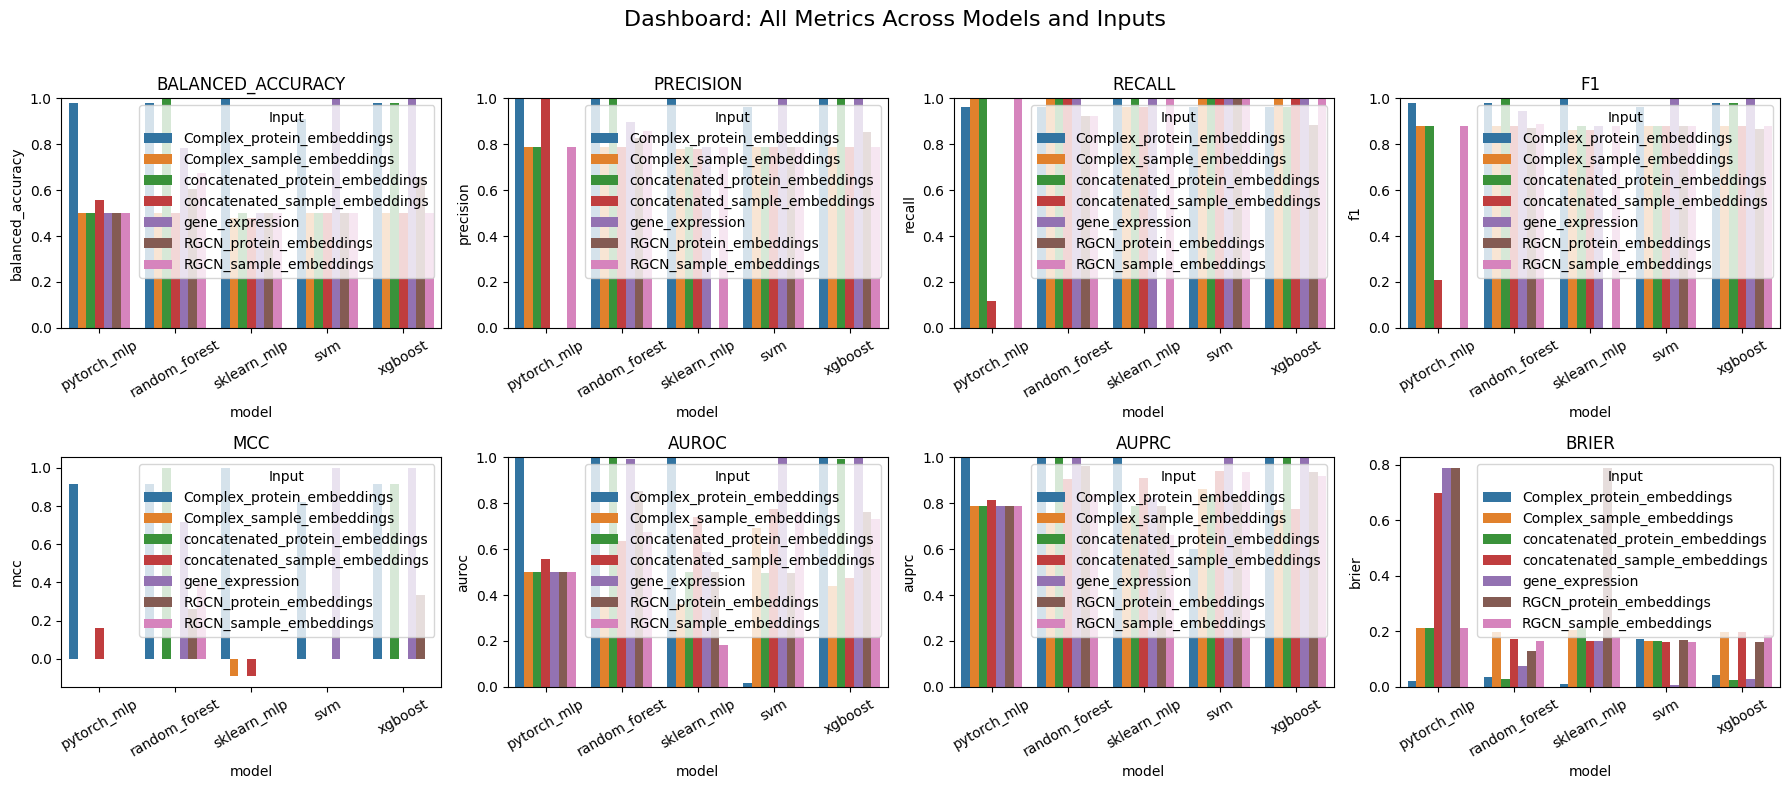

In [ ]:
collector = ResultsCollector()
dashboard = DashboardVisualizer(filtered_results, collector)
dashboard.plot_metric_grid()

### 2. heatmap

model_dataset x score matrix 

In [ ]:
# metric='balanced_accuracy'

In [97]:
filtered_results

,model,input,normalization,version,balanced_accuracy,precision,recall,f1,mcc,auroc,auprc,brier
0,pytorch_mlp,Complex_protein_embeddings,none,v2.10,0.980769,1.000000,0.961538,0.980392,0.917249,1.000000,1.000000,0.019917
1,pytorch_mlp,Complex_sample_embeddings,none,v2.10,0.500000,0.787879,1.000000,0.881356,0.000000,0.500000,0.787879,0.212121
2,pytorch_mlp,concatenated_protein_embeddings,none,v2.10,0.500000,0.787879,1.000000,0.881356,0.000000,0.500000,0.787879,0.212121
3,pytorch_mlp,concatenated_sample_embeddings,none,v2.10,0.557692,1.000000,0.115385,0.206897,0.164083,0.557692,0.812354,0.696970
4,pytorch_mlp,gene_expression,none,,0.500000,0.000000,0.000000,0.000000,0.000000,0.500000,0.787879,0.787879
5,pytorch_mlp,RGCN_protein_embeddings,none,v2.10,0.500000,0.000000,0.000000,0.000000,0.000000,0.500000,0.787879,0.787879
6,pytorch_mlp,RGCN_sample_embeddings,none,v2.10,0.500000,0.787879,1.000000,0.881356,0.000000,0.500000,0.787879,0.212121
7,random_forest,Complex_protein_embeddings,none,v2.10,0.980769,1.000000,0.961538,0.980392,0.917249,1.000000,1.000000,0.034265
8,random_forest,Complex_sample_embeddings,none,v2.10,0.500000,0.787879,1.000000,0.881356,0.000000,0.379121,0.752217,0.197538
9,random_forest,concatenated_protein_embeddings,none,v2.10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.029705


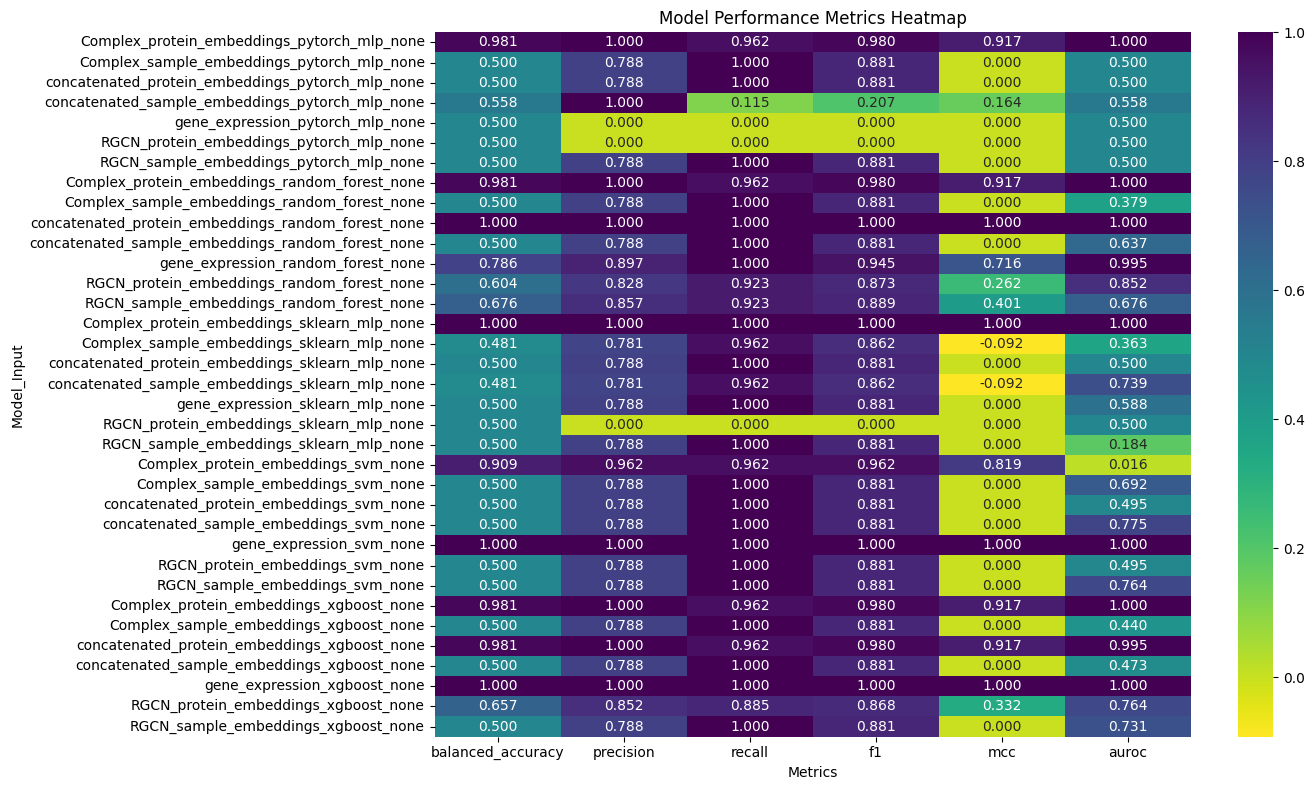

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['balanced_accuracy', 'precision', 'recall', 'f1', 'mcc', 'auroc']
filtered_results['model_input'] = filtered_results['input'] + '_' + filtered_results['model'] + '_' + filtered_results['normalization']
heatmap_data = filtered_results.set_index('model_input')[metrics]

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, cmap="viridis_r", fmt=".3f")
plt.title("Model Performance Metrics Heatmap")
plt.ylabel("Model_Input")
plt.xlabel("Metrics")

plt.yticks(rotation=0) 
plt.tight_layout()
plt.show()


### 3. radar plot

To be more readbale better make a radar plot per model (one for svm, one for xgboost...)

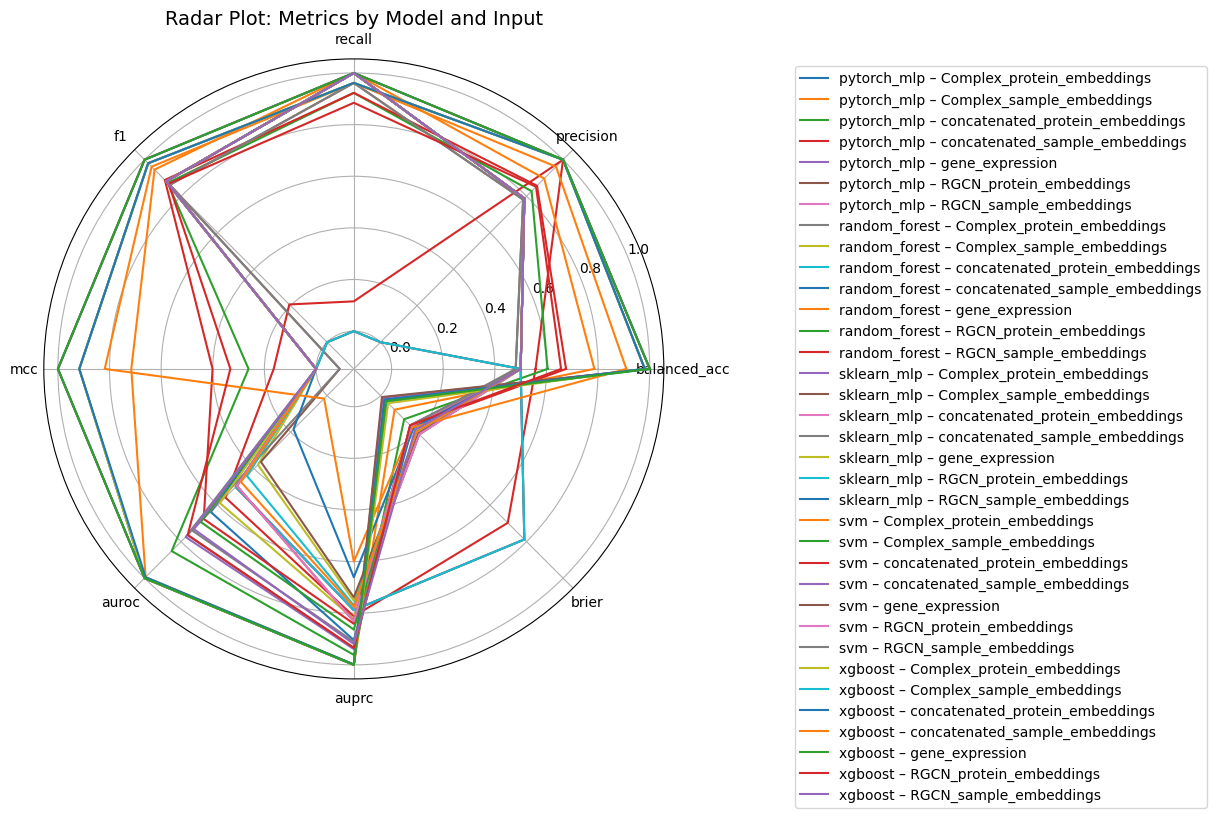

In [51]:
dashboard.plot_radar()

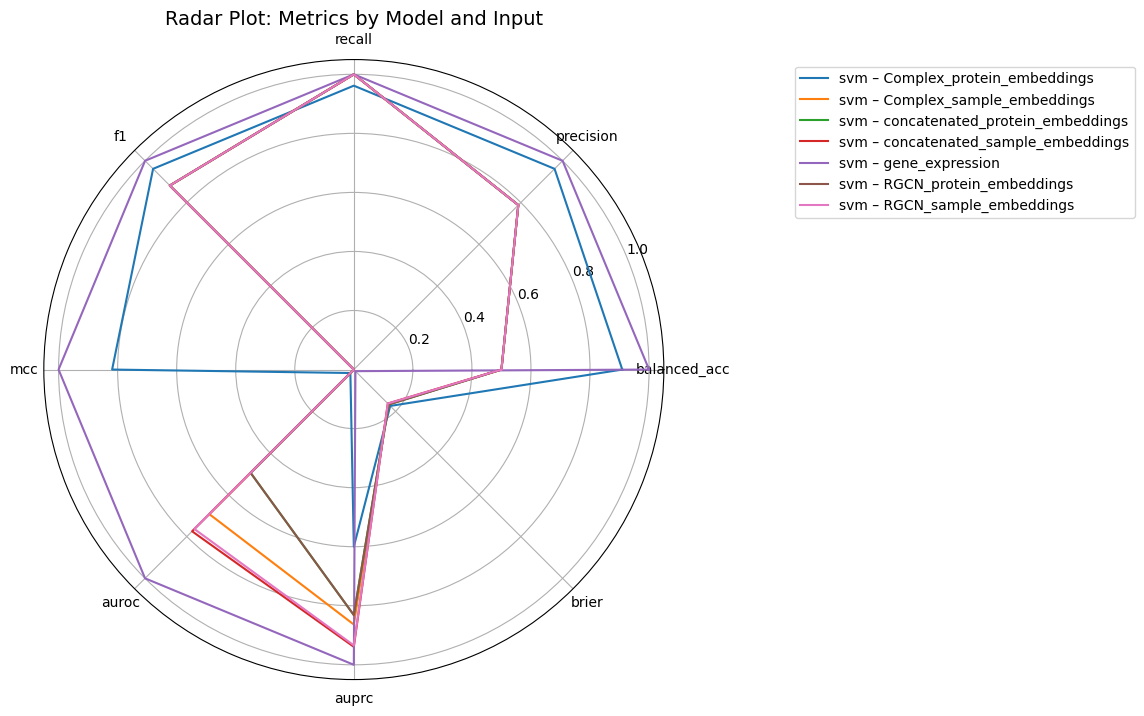

In [52]:
collector = ResultsCollector()
svm_filtered_results=filtered_results[filtered_results['model']=='svm']
dashboard = DashboardVisualizer(svm_filtered_results, collector)
dashboard.plot_radar()

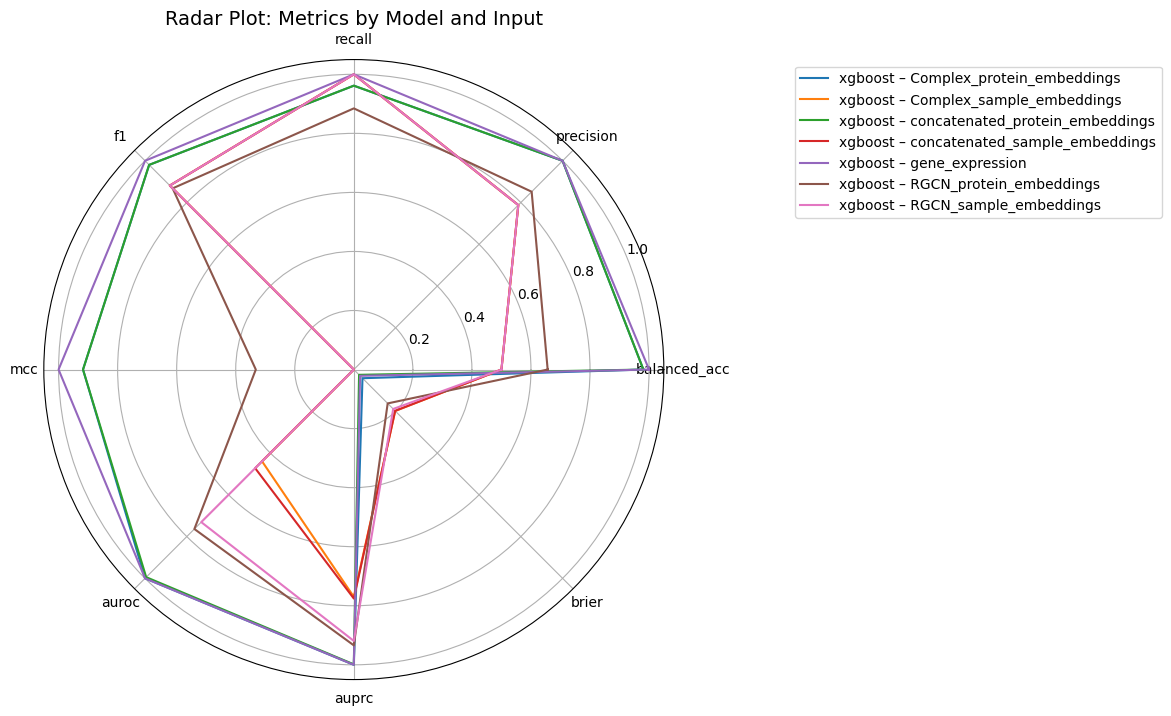

In [53]:
collector = ResultsCollector()
xgboost_filtered_results=filtered_results[filtered_results['model']=='xgboost']
dashboard = DashboardVisualizer(xgboost_filtered_results, collector)
dashboard.plot_radar()


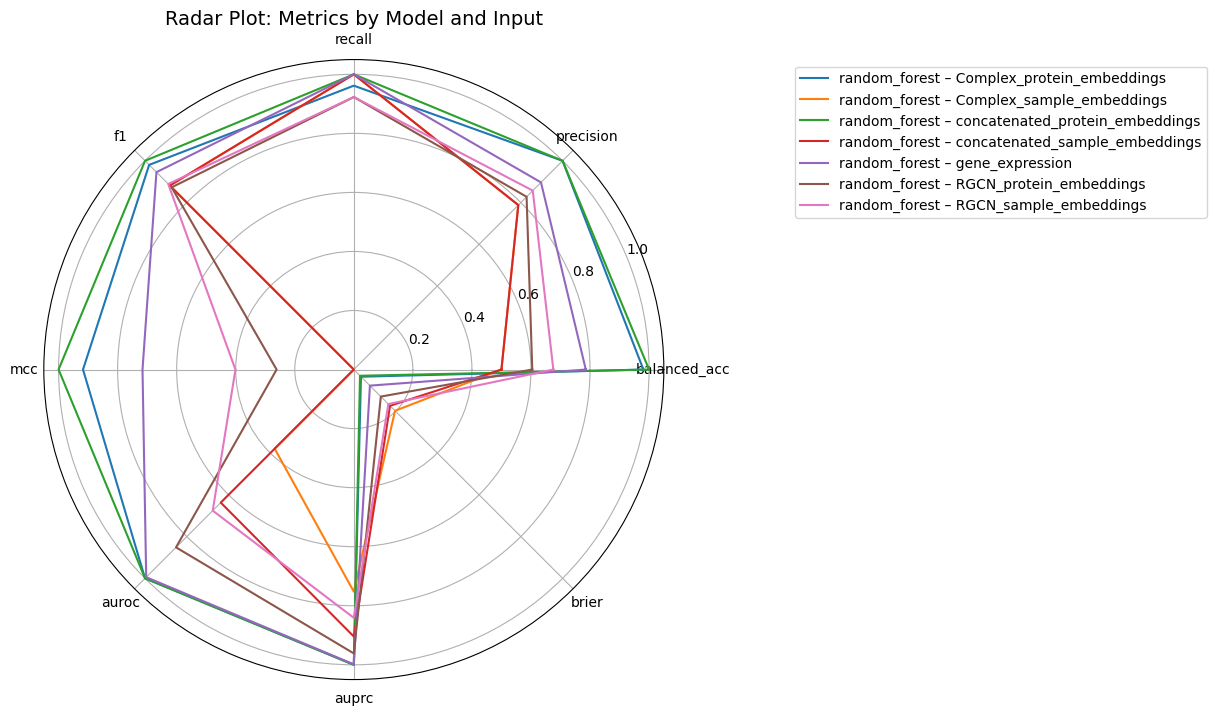

In [54]:
collector = ResultsCollector()
random_forest_filtered_results=filtered_results[filtered_results['model']=='random_forest']
dashboard = DashboardVisualizer(random_forest_filtered_results, collector)
dashboard.plot_radar()

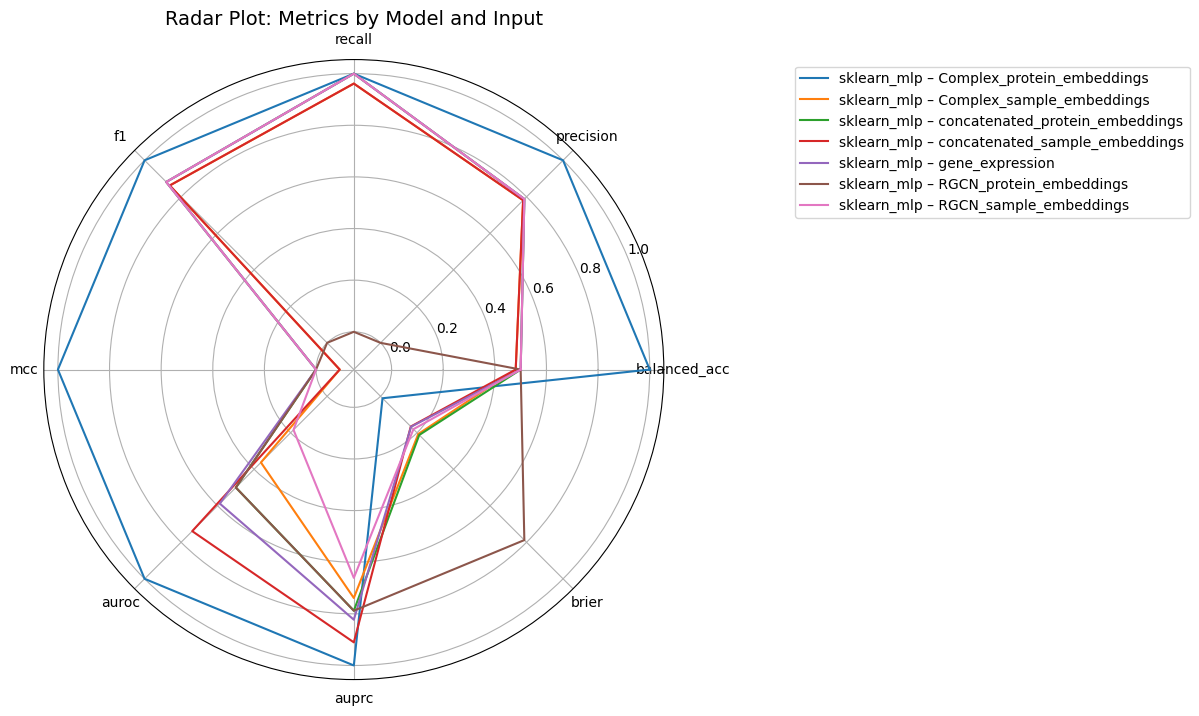

In [56]:
collector = ResultsCollector()
sklearn_mlp_filtered_results=filtered_results[filtered_results['model']=='sklearn_mlp']
dashboard = DashboardVisualizer(sklearn_mlp_filtered_results, collector)
dashboard.plot_radar()

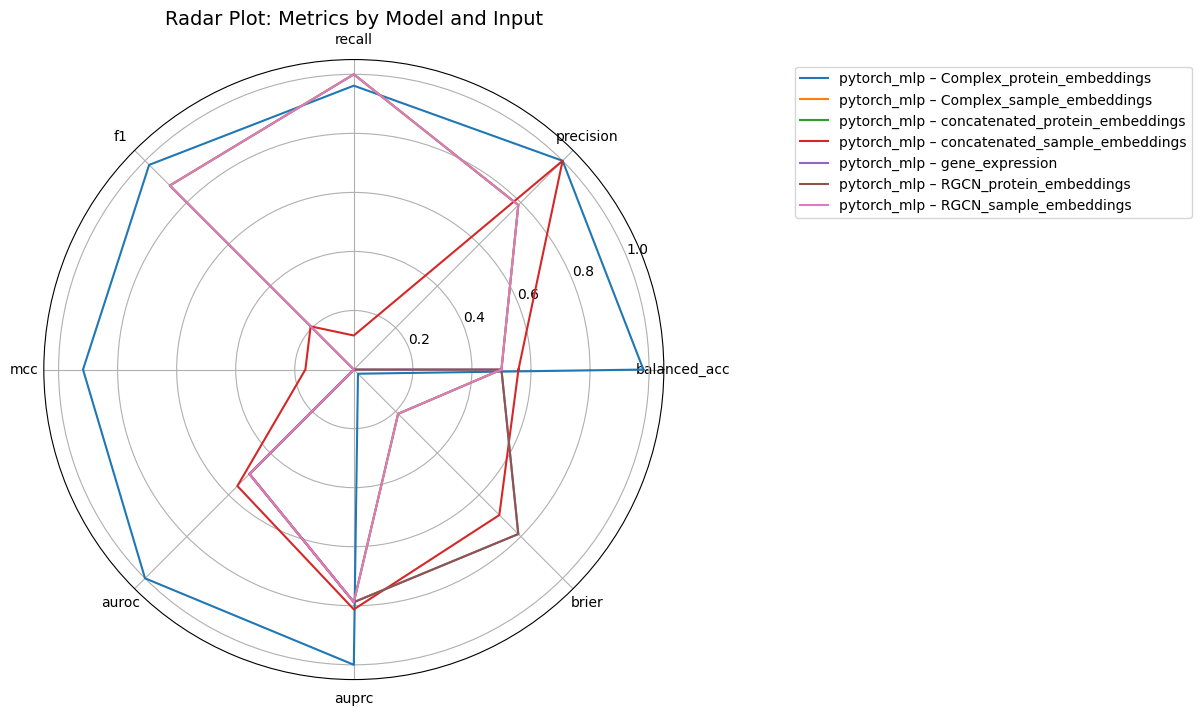

In [57]:
collector = ResultsCollector()
pytorch_mlp_filtered_results=filtered_results[filtered_results['model']=='pytorch_mlp']
dashboard = DashboardVisualizer(pytorch_mlp_filtered_results, collector)
dashboard.plot_radar()

### 5. scatter plot

somparing 2 strong(?) models, each point is a dataset+metrix, can have shape of point by metric and color by dataset (or just for one metric for now)

In [61]:
metric='precision'

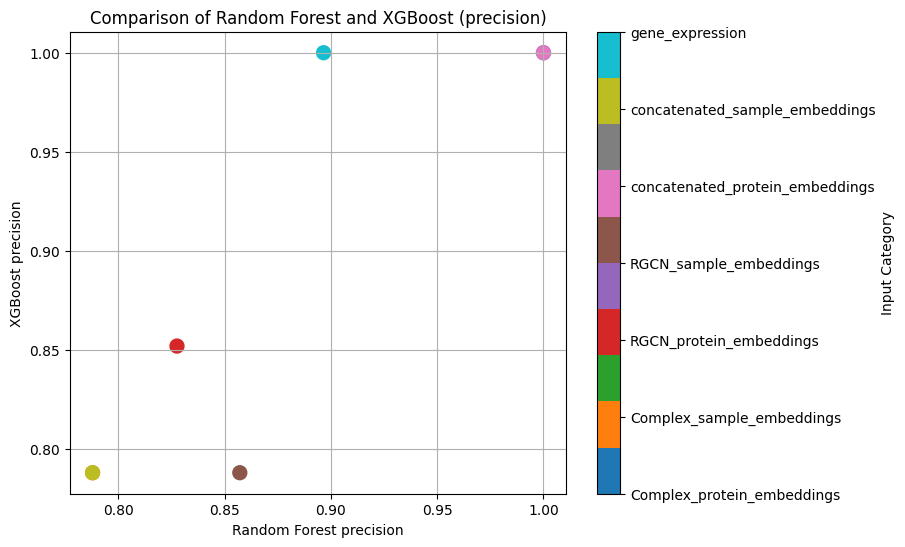

In [64]:
import matplotlib.pyplot as plt

rf = filtered_results[filtered_results['model'] == 'random_forest'][['input', metric]]
xgb = filtered_results[filtered_results['model'] == 'xgboost'][['input', metric]]

merged = rf.merge(xgb, on='input', suffixes=('_rf', '_xgb'))

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    merged[metric + '_rf'],
    merged[metric + '_xgb'],
    s=100,
    c=merged['input'].astype('category').cat.codes,
    cmap='tab10'
)

plt.xlabel('Random Forest ' + metric)
plt.ylabel('XGBoost ' + metric)
plt.title('Comparison of Random Forest and XGBoost (' + metric + ')')
plt.grid()

cbar = plt.colorbar(scatter)
cbar.set_label('Input Category')
cbar.set_ticks(range(len(merged['input'].astype('category').cat.categories)))
cbar.set_ticklabels(merged['input'].astype('category').cat.categories)

plt.show()


### 6. rank dist plot
showing the rank distribution of models over datasets for a given metric

In [95]:
metric='balanced_accuracy'

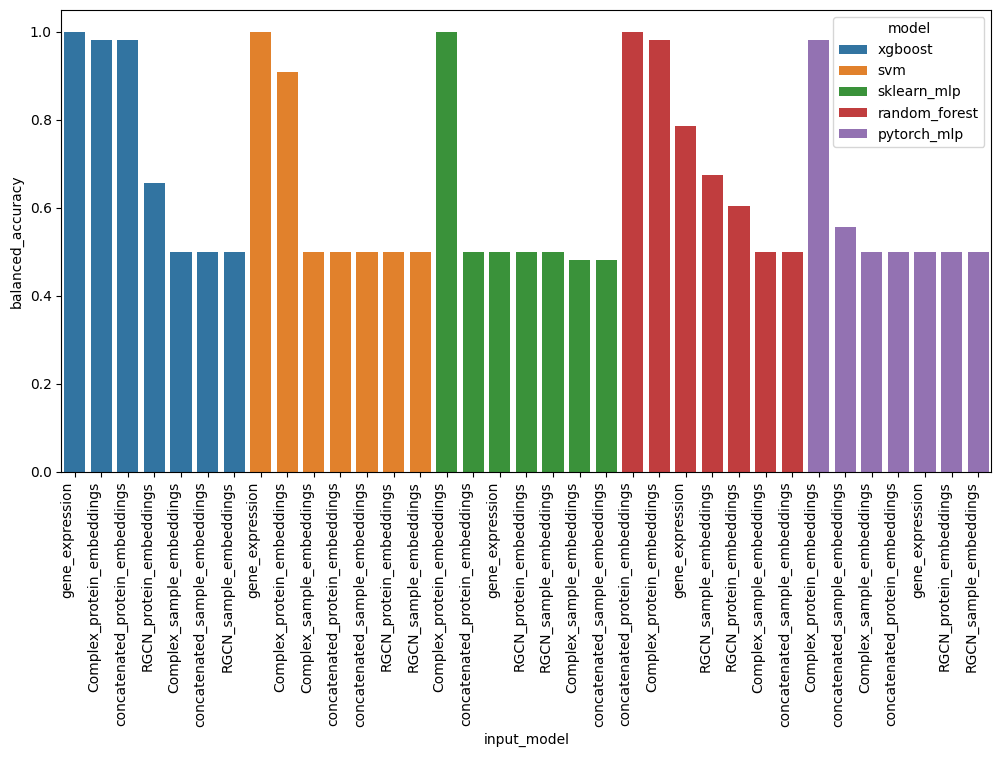

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -- df sorted by model then by metric
sorted_df=filtered_results.sort_values(by=['model', metric],ascending=False)
sorted_df['input_model']=sorted_df['input']+'_'+sorted_df['model']

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=sorted_df, x='input_model', y=metric, hue='model', dodge=False, palette='tab10')

ax.set_xticks(range(len(sorted_df)))
ax.set_xticklabels(sorted_df['input'], rotation=90, ha='right', fontsize=10)

# # bar plot and color by model
# plt.figure(figsize=(12, 6))
# sns.barplot(data=sorted_df, x='input_model', y=metric,hue='model')
# plt.title(f'Model Performance by {metric.capitalize()}')
# plt.xlabel('trained model')
# plt.ylabel(metric.capitalize())
# plt.xticks(rotation=45, ha='right', fontsize=10)
# plt.legend(title='Model')
# plt.tight_layout()
plt.show()